<h2 style="color:green" align="center"> Machine Learning With Python: Linear Regression Multiple Variables</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below is the table containing home prices in monroe twp, NJ. Here price depends on **area (square feet), bed rooms and age of the home (in years)**. Given these prices we have to predict prices of new homes based on area, bed rooms and age.

<img src="homeprices.jpg" style='height:200px;width:350px'>

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

y = mx + b
y=m(area*bedroom*age)+b
y= m(area)+m(bedroom)+m(age)+b

We will use regression with multiple variables here. Price can be calculated using following equation,

<img src="equation.jpg" >

Here area, bedrooms, age are called independant variables or **features** whereas price is a dependant variable

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


**Data Preprocessing: Fill NA values with median value of a column**

In [ ]:
a = df.bedrooms.median()

In [7]:
df.bedrooms = df.bedrooms.fillna(a)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
x_axis = df.drop('price',axis='columns')

In [8]:
reg = linear_model.LinearRegression()
# reg.fit(data, result)
reg.fit(x_axis,df.price)

LinearRegression()

In [9]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [10]:
reg.intercept_

221323.00186540408

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [11]:
reg.predict([[3000, 3, 40]])

c:\Users\muhammad.amad\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
y = (m1*x1 + m2*x2 + m3*x3) +b

In [10]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

**Find price of home with 2500 sqr ft area, 4 bedrooms,  5 year old**

In [11]:
reg.predict([[2500, 4, 5]])

array([578876.03748933])

<h3>Exercise<h3>

In exercise folder (same level as this notebook on github) there is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,


**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**


<h3>Answer<h3>

53713.86 and 93747.79

In [7]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [8]:
a = df.test_score.mean()
df.test_score = df.test_score.fillna(a)
df

,experience,test_score,interview_score,salary
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [11]:
text_to_number = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11
}
df['experience'] = df['experience'].map(text_to_number)

In [12]:
df

,experience,test_score,interview_score,salary
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [13]:
df['experience'].fillna(0, inplace=True)
df

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_6428\1323845909.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience'].fillna(0, inplace=True)


,experience,test_score,interview_score,salary
0,0.0,8.000000,9,50000
1,0.0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [19]:
import matplotlib.pyplot as plt

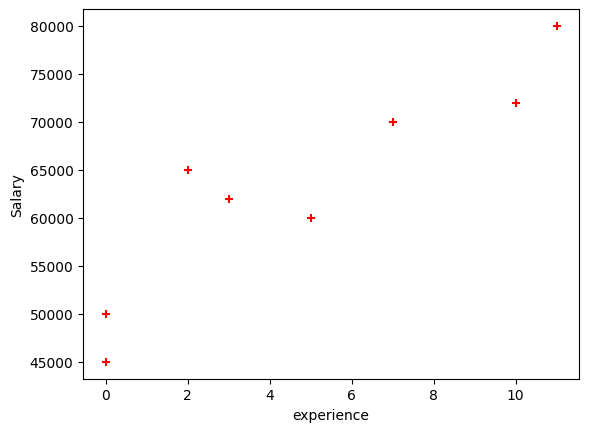

In [20]:
%matplotlib inline
plt.xlabel('experience')
plt.ylabel('Salary')
plt.scatter(df.experience,df.salary,color='red',marker='+')
plt.show()

**So according to given scenerio we have three independent variable(experience,test_score,interview_score) and one is dependent(salary)**

In [14]:
X = df.drop('salary',axis='columns')
X

,experience,test_score,interview_score
0,0.0,8.000000,9
1,0.0,8.000000,6
2,5.0,6.000000,7
3,2.0,10.000000,10
4,7.0,9.000000,6
5,3.0,7.000000,10
6,10.0,7.857143,7
7,11.0,7.000000,8


In [15]:
Y = df.salary
Y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64

In [21]:
model = linear_model.LinearRegression()
model.fit(X,Y)

LinearRegression()

In [22]:
model.predict([[2,9,6]])

C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

In [23]:
model.coef_

array([2827.63404314, 1912.93803053, 2196.9753141 ])

In [24]:
model.intercept_

17237.330313727172

**Mathematically**

In [25]:
(2*2827.63404314+9*1912.93803053+6*2196.9753141)+17237.330313727172

53290.89255937717

So Mathematically and through model results are same. 

In [26]:
model.predict([[12,10,10]])

C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])

In [27]:
(12*2827.63404314+10*1912.93803053+10*2196.9753141)+17237.330313727172

92268.07227770716

In [29]:
model.score(X,Y)

0.9639958361860579

excersise concluded